## Tweets about suicide: identify stories of bereaved individuals - a machine learning approach


### Project summary
The Computational Social Science Lab investigates social science questions using advanced computational methods. One of their current research questions is how social media content about suicide influences suicide rates in the general population. More specifically, the research group is analysing Twitter posts to determine the association of particular Tweet frequencies with actual suicide rates. The idea is that different types of posts, such as problem- or solution-oriented tweets, could have a positive or negative impact on individuals and even help them cope with their suicidal thoughts and difficult situation. A long-term goal would be to improve guidelines on how to write and report about suicide to prevent suicide.
To do this, the research group needs to automatically categorize how people, news and non-governmental organizations tweet about suicide. The type of tweets varies heavily from personal reporting, over news articles about celebrities committing suicide, to prevention tweets. For this reason, the first step in this research project was to categorize a large amount of Twitter posts into different classes of tweets. In a second step, the team trained machine learning models that automatically recognize these types of tweets. While the team already did this for 6 important categories of tweets, more data needs to be labelled and new machine learning models need to be trained to distinguish even more novel categories. This is exactly the goal of my research project. My contribution to the project will be to create a new labelled dataset for two more categories, and then train a machine learning algorithm that can automatically categorize such posts. I plan to focus on stories of bereaved individuals who lost a loved one to suicide. Such stories can either be entirely negative and talk about suffering only, or mention that the person found a way of coping with their loss. Should it be difficult to find such tweets, I could also focus on two types of tweets by news agencies, namely celebrity stories about suicidal ideation and suffering or stories of coping with a suicidal crisis. To do this, I plan to first conduct a keyword search using frequent terms already identified by the research group, and later refine the categories using descriptive methods such as word clouds and word frequency analysis. In this way, I anticipate obtaining a dataset of about 200 labelled tweets per category that can then be used to train a machine learning algorithm to automatically classify the posts into negative or coping stories of bereaved individuals. We plan to use a word frequency representation of the terms in tweets (term-frequency inverse-document-frequency) and train a linear support vector machine classifier. While we aim to finish the step of describing the two new categories using natural language processing during the semester, training a successful machine learning model is optional, and can be extensive depending on how fast I can create a high-quality dataset. In future research, such a machine learning model can be used to classify a very large set of tweets and understand their association with suicide rates in the population. By preparing a dataset and starting to implement such a categorization algorithm, I am assisting the research group in extending their analyses of tweets and suicide rates to two new types of social media posts about suicide, which will eventually help to improve reporting guidelines for the media and for social media users.

Timeframe: SS22, March 2022 - July 2022

Goal: Label 200 tweets for each of the two categories of bereaved suffering or bereaved coping, and training a tf-idf & SVM classifier

Owner: Anja Huber, Supervisor: Hannah Metzler

-----------------------------------------------------------------------------------------------------------------------------------------------

### 1. Preparation of Environment
The Environment is prepared by loading all necessary packages and libraries. Also first investigation into the "old data" was done to understand current state of the research

In [ ]:
# Prepare environemnt, load packages
%pip install pandas
%pip install wordcloud
%pip install nltk
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm

# note: the M1 chip makes issues with the installation of scikit, installation in terminal works with line: pip3 install -U --no-use-pep517 scikit-learn

In [ ]:
# Load old training data into workspace
df_old_training_tweets = pd.read_csv('/Users/anja/Documents/GitHub/suicide_bereaved_stories/training_data/training_posts20220321_clean.tsv', sep='\t')

# Load original twitter data into workspace
df_all_tweets = pd.read_csv('/Users/anja/Documents/DataIntoResearchII/all_tweets.csv', sep= '","')

In [ ]:
# Check out all tweets dataset
df_all_tweets.head()

In [ ]:
# Check out old training dataset
df_old_training_tweets.head()

In [16]:
# Store the tweets about bereaved experience in extra dataframe
df_beraved_old_training_data = df_old_training_tweets[df_old_training_tweets['type'] == 'bereaved experience']

After scanning through the created dataframe for bereaved experience, some new insights could be generated

Key learnings:
- For me it is already very hard to understand difference between coping and negative, the difference is not always clear
- Terms I found interesting for bereaved coping: "I think about you", "life changed", "miss you", "survived", "I lost", "other answer", "never the answer", "difficult journey", "move", "brother/sister/cousin/mom/dad/mother/father/friend/daughter/son", "find meaning", "hope AND future", "be in my/our heart", "suicide note"
- Terms I found interesting for bereaved negative: "struggled", "has been rough", "guilty", "hurts", "worse", "miss [as last part of tweet]"

Anohter resource which can be used to identify more bereaved experience posts are the already created wordclouds for the two categories
They contain the words:
- Bereaved negative: "friend", "suicide", "confessed", "heart", "cousin", "losing", "ago", "mom", "best experience", "grade lost", "first", "thoughts", "sorry", "freshmen", "physically", "disappointed"
- Bereaved coping: "something", "donate", "special", "honor", "start", "close", "lost", "resilience", "died", "huge", "son", "healing", "brother"

### 2. Keyword Search
Keyword search in the terminal was used to identify more bereaved tweets. It helped us understanding the bereaved categories better

In [1]:
# DO NOT RUN
# Example terminal code to search through all_tweets datafile locally and generat subfiles for selecting only bereaved tweets as training dataset

# grep "mom" all_tweets.csv > mom.csv
# grep "my mom died" all_tweets.csv > momdied.csv
# grep "my son died" all_tweets.csv > mysondied.csv
# grep "died by suicide" all_tweets.csv > diedbysuicide.csv
# grep "my" diedbysiucide.csv > mydiedbysuicide.csv
# grep "my\| notice" all_tweets.csv > myANDnotice.csv
# grep "I lost" all_tweets.csv > ilost.csv

What I learned from my search through the files, things I tried but did not work well, what I decided to use 
- "Mom", does not work well many teens complain about their moms and rather from first person perspective telling that they are suicidal
- "My mom died" often leads to suicidal thoughts but not to bereaved stories
- When people report in a negative way from a personal stroy about suicide (bereaved) they often do so in a direct conversation to somebody, so text is starting with a mention
- Way less posts with word "sister" which are relevant, how are gender stats related to suicide?
- Coping often together with religous thoughts
- Very often birthday / anniversary messages
- Sometimes stories from veterans coming back from war
- Algorithm probably will work best for US as the stories and tweets are very related to the culture, for example the stories about war and also sometimes the mentioning of guns 

Questions:
- How close does the relationship has to be? kids of friends? close enough? students of a teacher?; after talking with Hannah about it we came to the conclusion that the relation does count as important and close enough when the post will likely affect others

#### Searchterms
- Search terms which worked well or at least satisfying were "I lost", "ago", "brother", "cousin", "I miss you", "my best friend"
- Search terms which were e.g. not specific enough and lead to many not relevant results were: "died by suicide", "friend", "grade lost", "has been rough", "healing", "huge", "miss you", "mom", "my" + "notice", "my" + "died by suicide", "my mom died", "my son died", "sister", "suicide note", "suicide notice", "took his life", "we lost"

### 3. Bereaved Tweets - Load Labeled Dataset
The final bereaved dataset is loaded into the environment. It was created by manually filtering through the orignial dowload of all tweets

In [135]:
# Load labeled data, off-topic tweets and other suicidal tweets, create date field, clean names and mentions
df_bereaved_tweets = pd.read_csv('/Users/anja/Documents/GitHub/suicide_bereaved_stories/training_data/bereaved_dataset.csv')
df_offtopic = pd.read_csv("/Users/anja/Documents/GitHub/suicide_bereaved_stories/training_data/offtopic_dataset.csv")
df_6categories = pd.read_csv("/Users/anja/Documents/GitHub/suicide_bereaved_stories/training_data/6previouscategories_dataset.csv")

df_bereaved_tweets['date'] = pd.to_datetime(df_bereaved_tweets['timestamp'])

#df_bereaved_tweets.head()
# df_bereaved_tweets.info()

### 4. Preprocessing
Preprocessing is done to clean the data from links and mentions and prepare it in a best possible way to not bias the model. In the original paper the research group did decide to not use all usually standard preprocessing steps because they did not impact the performance of the model in a positive manner.

In [136]:
# Preprocessing
# Function to preprocess tweets, TODO: put in extra file
def anjas_magic_preprocessing(x):
    x = x.lower()                                       # lowercase all tweet text
    x = re.sub(r'@\w+', ' @User', x)                    # replaces mention with word @User
    x = re.sub('https?://\S+|www\.\S+', '@TwURL', x)    # replaces any URL with word TwURL
    return x

# Apply preprocessing function to all lines in dataframe and create a new column
df_bereaved_tweets['preprocessed_tweet_text'] = df_bereaved_tweets['tweet_text'].apply(anjas_magic_preprocessing)
df_offtopic["preprocessed_tweet_text"] = df_offtopic['tweet_text'].apply(anjas_magic_preprocessing)
df_6categories["preprocessed_tweet_text"] = df_6categories['tweet_text'].apply(anjas_magic_preprocessing)


In [61]:
# Only for personal practice, not needed, In original paper it is noted that removing stopwords did not improve model performance

# Remove stopwords, also add TwURL and @User to stopwords as we don't want them to appear in wordclouds or analysis
# stopsis = stopwords.words('english')
# stopsis = stopsis + '@User @TwURL'.split()
# df_bereaved_tweets["preprocessed_tweet_text"] = df_bereaved_tweets["preprocessed_tweet_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopsis)]))

In [69]:
# Only for personal practice, not needed, In original paper it is noted that lemmatization did not improve model performance

# Lemmatization, change words to stam words
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk import word_tokenize
# sents = df_bereaved_tweets["preprocessed_tweet_text"]
# lmtzr = WordNetLemmatizer()
# df_bereaved_tweets["lemmatized"] = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
#               for s in sents]

In [118]:
# Wordclouds & word frequency - preparing data / creating splitted dataframes

# Split dataframe in two categories to display wordcloud per category
df_coping = df_bereaved_tweets[df_bereaved_tweets['category'] == "coping"]
df_negative = df_bereaved_tweets[df_bereaved_tweets['category'] == "negative"]
df_neutral = df_bereaved_tweets[df_bereaved_tweets['category'] == "other bereaved"]

# Create two combined text files from all tweet texts; one per category - needed for word clouds
tweet_text_coping = " ".join(review for review in df_coping.preprocessed_tweet_text)
tweet_text_negative = " ".join(review for review in df_negative.preprocessed_tweet_text)
tweet_text_neutral = " ".join(review for review in df_neutral.preprocessed_tweet_text)

### 5. Descriptive Text Statistics
Wordcloud images are computed to get an understanding about the tweet categories

#### Wordcloud of Bereaved Negative Tweets

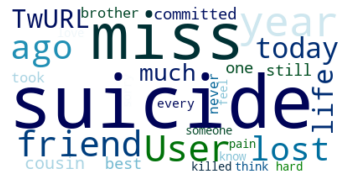

In [119]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=30, background_color="white", colormap= 'ocean',collocations = False).generate(tweet_text_negative)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

#### Wordcloud of Bereaved Coping Tweets

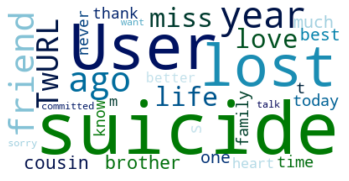

In [120]:
 # Create and generate a word cloud image:
wordcloud = WordCloud(max_words=30, background_color="white", colormap= 'ocean',collocations = False).generate(tweet_text_coping)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Wordcloud of Bereaved Neutral Tweets

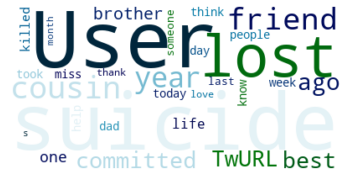

In [121]:
 # Create and generate a word cloud image:
wordcloud = WordCloud(max_words=30, background_color="white", colormap= 'ocean',collocations = False).generate(tweet_text_neutral)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 6. Modelling
TF-IDF is used to translate the words in the tweets into importandy metrics which then can be used to train a model. SVM is used as model, with a GridSearch we tried to improve the performance of the model by tuning the hyperparameters


#### SVMC - Support Vector Machine Classifier to Differentiate Inbetween Bereaved Class

In [122]:
# Combine off topic dataframe with new labelled dataframe to train model
df1 = df_offtopic[['category','preprocessed_tweet_text']] 

# Randomly select certain amount of datapoints form the offtopic dataset to have similar distribution
df1 = df1.sample(n=52)

df2 = df_bereaved_tweets[['category','preprocessed_tweet_text']]
df2 = df2[df2["category"]=="other bereaved"]
df2 = df2.sample(n=52)

df3 = df_bereaved_tweets[['category','preprocessed_tweet_text']]
df3 = df3[df3["category"]=="coping"]
df3 = df3.sample(n=52)

df4 = df_bereaved_tweets[['category','preprocessed_tweet_text']]
df4 = df4[df4["category"]=="negative"]
df4 = df4.sample(n=52)

# Combine dataframe
df_combined = pd.concat([df1, df2, df3, df4])

# Check distribution of classes in dataset
print(df_combined.groupby('category').size())


category
coping            52
negative          52
off-topic         52
other bereaved    52
dtype: int64


In [123]:

# TF-IDF, convert strings into importancy metric by using tf-idf vectorizer, this is used as input for the model
TV = TfidfVectorizer()
X = TV.fit_transform(df_combined["preprocessed_tweet_text"]).toarray()
y = df_combined["category"].values

# Check shape of model inputs
print(np.shape(X))
print(np.shape(y))

# Check content of model input
y[30]

# Split the dataset into training and test set, stratify guarantees that the distribution of categories in both is similar to original dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=df_combined["category"])

(208, 1295)
(208,)


In [124]:
# Train the model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make prediction with trained model and test dataset
y_predict = model.predict(X_test)

Overall model performance:

In [125]:

# Check models Performance with the help of different performance metrics

# Accuracy: how many of the predictions were true predictions, problem: in case one group is overrepresented in the data and the algorithm always classifies as this group it will have a high accuracy even though performance is not good
print("Accuracy:",accuracy_score(y_test, y_predict))

# Precision
print("Precision:",precision_score(y_test, y_predict, average='macro'))

# Recall
print("Recall:",recall_score(y_test, y_predict, average='macro'))

# F1: combination metric of precision and recall
print("F1:",f1_score(y_test, y_predict,average='macro')) # micro because the groups are not equally distributed, the score is weighted by group size

Accuracy: 0.5714285714285714
Precision: 0.6086538461538461
Recall: 0.5795454545454546
F1: 0.5700757575757576


Model performance per tweet category:

In [126]:
target_names = ["neutral", "coping", "negative", "off-topic"]
print(classification_report(y_test, y_predict, target_names=target_names, digits=3))

              precision    recall  f1-score   support

     neutral      0.385     0.455     0.417        11
      coping      0.800     0.364     0.500        11
    negative      0.833     1.000     0.909        10
   off-topic      0.417     0.500     0.455        10

    accuracy                          0.571        42
   macro avg      0.609     0.580     0.570        42
weighted avg      0.608     0.571     0.565        42



Text(0.5, 1.0, 'Classic Modelling Confusion Matrix')

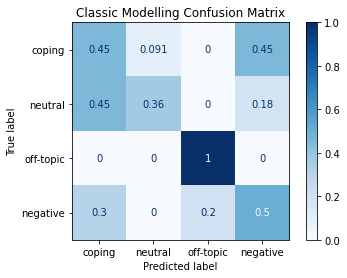

In [127]:
# Create confustion matrix to better understand prediction quality

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test, 
    display_labels = ["coping", "neutral", "off-topic", "negative"],
    cmap = plt.cm.Blues,
    normalize = "true",
    )
disp.ax_.set_title("Classic Modelling Confusion Matrix")


In [128]:
# Using Grid Search to find optimal model hyperparameters
# Create a searchspace for the hyperparameters we d like to test

search_space = {
        "gamma" : [0.0001, 0.001, 0.01], # how loosely or exact is the model fit to data
        "kernel": ["linear", "rbf"], # is the data linear separable or multidimensional?
        "C":[0.00001, 0.0001, 0.001, 0.01], # allowed missclassification
}

model = svm.SVC()

from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(
    estimator = model,
    param_grid = search_space,
    scoring = ["precision_macro", "f1_macro"],
    refit = "f1_macro", # when set to true, there is no testdata used, training runs on all data
    cv = 4 # crossvalidation, calculates the mean of 4 times running the model in each setting on different subsets of data
   )

GS.fit(X_train, y_train) 

test_prediction_GridSearch = GS.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [129]:
# Print performance metrics of Grid Search
print(GS.best_params_)
print(GS.best_score_)

# Storing the results in a CSV file
#df = pd.DataFrame(GS.cv_results_)
#df.to_csv("svm_results_gridsearch.csv", index = False)

# Classification Report GridSearch
print(classification_report(y_test, test_prediction_GridSearch, target_names=target_names, digits=3))


{'C': 1e-05, 'gamma': 0.0001, 'kernel': 'linear'}
0.09709653092006032
              precision    recall  f1-score   support

     neutral      0.000     0.000     0.000        11
      coping      0.000     0.000     0.000        11
    negative      0.556     1.000     0.714        10
   off-topic      0.292     0.700     0.412        10

    accuracy                          0.405        42
   macro avg      0.212     0.425     0.282        42
weighted avg      0.202     0.405     0.268        42



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Text(0.5, 1.0, 'GridSearch Confusion Matrix')

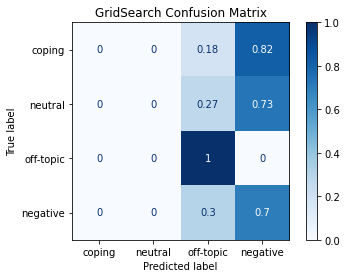

In [130]:
# Create confustion matrix to better understand prediction quality

disp = ConfusionMatrixDisplay.from_estimator(
    GS,
    X_test, 
    y_test, 
    display_labels = ["coping", "neutral", "off-topic", "negative"],
    cmap = plt.cm.Blues,
    normalize = "true",
    )
disp.ax_.set_title("GridSearch Confusion Matrix")

#### SVMC - Support Vector Machine Classifier to Differentiate Bereaved Tweets from Other Tweets

In [139]:
# Create datasets for off-topic, all suicide related & bereaved tweets
df1 = df_offtopic[['category','preprocessed_tweet_text']] 
df2 = df_bereaved_tweets[['category','preprocessed_tweet_text']] 
df3 = df_6categories[['main_category','preprocessed_tweet_text']]

# Add a a new column description to train the model on in
df1['train_category'] = 'not_suicide'
df2['train_category'] = 'suicide_bereaved'
df3['train_category'] = 'suicide_but_not_bereaved' 

# Randomly select the same amount of items in each dataframe to fix distribution
df1 = df1.sample(n=429)
df2 = df2.sample(n=429)
df3 = df3.sample(n=429)

# Combine all dataframes
df_combined = pd.concat([df1, df2, df3])

# Check distribution of classes in dataset
print(df_combined.groupby('train_category').size())

train_category
not_suicide                 429
suicide_bereaved            429
suicide_but_not_bereaved    429
dtype: int64


/var/folders/94/kbz524cd32j80_2tm_hwnr780000gn/T/ipykernel_8392/337301225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['train_category'] = 'not_suicide'
/var/folders/94/kbz524cd32j80_2tm_hwnr780000gn/T/ipykernel_8392/337301225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['train_category'] = 'suicide_bereaved'
/var/folders/94/kbz524cd32j80_2tm_hwnr780000gn/T/ipykernel_8392/337301225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [140]:
# TF-IDF, convert strings into importancy metric by using tf-idf vectorizer, this is used as input for the model
TV = TfidfVectorizer()
X = TV.fit_transform(df_combined["preprocessed_tweet_text"]).toarray()
y = df_combined["train_category"].values

# Split the dataset into training and test set, stratify guarantees that the distribution of categories in both is similar to original dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=df_combined["train_category"])

(1287, 4587)
(1287,)


In [141]:
# Train the model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Make prediction with trained model and test dataset
y_predict = model.predict(X_test)

In [145]:
# Precision
print("Precision:",precision_score(y_test, y_predict, average='macro'))

# Classification report
target_names = ["not_suicide", "suicide_bereaved", "suicide_but_not_bereaved"]
print(classification_report(y_test, y_predict, target_names=target_names, digits=3))

Precision: 0.861327557163135
                          precision    recall  f1-score   support

             not_suicide      0.802     0.895     0.846        86
        suicide_bereaved      0.933     0.965     0.949        86
suicide_but_not_bereaved      0.849     0.721     0.780        86

                accuracy                          0.860       258
               macro avg      0.861     0.860     0.858       258
            weighted avg      0.861     0.860     0.858       258



Text(0.5, 1.0, 'Classic Modelling Confusion Matrix')

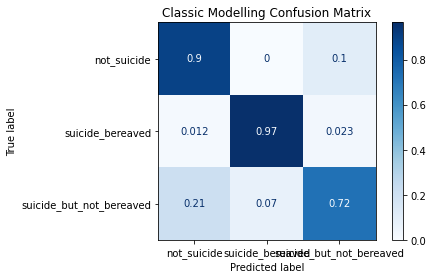

In [144]:
# Create confustion matrix to better understand prediction quality
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test, 
    display_labels = ["not_suicide", "suicide_bereaved", "suicide_but_not_bereaved"],
    cmap = plt.cm.Blues,
    normalize = "true",
    )
disp.ax_.set_title("Classic Modelling Confusion Matrix")

### 7. Discussion

- On Twitter, the distribution of irrelevant tweets and bereaved tweets is different from the one in the model training dataset. The estimation of of frequencies is 2% of bereaved tweets and 98% of other tweets. Further in the category of bereaved tweets there would be 55% negative, 11% coping and 34% neutral reportings.
- Other machine learning algorithms could perform better than the SVM classifier based on TF-IDF. In future work, researchers could for example train deep learning models and compare them one in this research
- Interesting keywords to identify bereaved tweets could be found
- The word clouds of the three subcategories of bereaved tweets look very similar, indicating that the categories need to be redefined.
- The model performs low in the innerclass distinction; probalby because the classes are not clearly distinct and the dataset is too small
- The model that distinguishes bereaved tweets from other suicide related and off-topic tweets performs a lot better.
- The use case "identify bereaved tweets" might actually be of higher relevance, as the bereaved experience ususally includes both coping and negativ emotions. It is always difficult and sad to have lost someone, but that does not mean the bereaved person has not found a way of dealing with the situation. Therefore it might not make sense to distinguish these emotional categories from one another. 